# VTK in Jupyter - (Embeded Images)

Perform initial imports before preceeding. 

In [1]:
import vtk
from IPython.display import Image
from IPython.display import display

A function to allow the output of a VTK pipeline to be displayed inline in the notebook (as an image).

In [2]:
def vtk_show(renderer, width=400, height=300):
    """
    Takes vtkRenderer instance and returns an IPython Image with the rendering.
    """
    renderWindow = vtk.vtkRenderWindow()
    renderWindow.SetOffScreenRendering(1)
    renderWindow.AddRenderer(renderer)
    renderWindow.SetSize(width, height)
    renderWindow.Render()
     
    windowToImageFilter = vtk.vtkWindowToImageFilter()
    windowToImageFilter.SetInput(renderWindow)
    windowToImageFilter.Update()
     
    writer = vtk.vtkPNGWriter()
    writer.SetWriteToMemory(1)
    writer.SetInputConnection(windowToImageFilter.GetOutputPort())
    writer.Write()
    data = str(buffer(writer.GetResult()))
    
    return Image(data)

A simple example that creates a sphere. The sphere size, color, and background can be changed to suit your needs. 

In [3]:
VtkSourceSphere = vtk.vtkSphereSource()
VtkSourceSphere.SetCenter(0.0, 0.0, 0.0)
VtkSourceSphere.SetRadius(10.0)
VtkSourceSphere.SetPhiResolution(360)
VtkSourceSphere.SetThetaResolution(360)

VtkMapperSphere = vtk.vtkPolyDataMapper()
VtkMapperSphere.SetInputConnection(VtkSourceSphere.GetOutputPort())

VtkActorSphere = vtk.vtkActor()
VtkActorSphere.SetMapper(VtkMapperSphere)
VtkActorSphere.GetProperty().SetColor(1.0, 0.0, 0.0)

VtkRenderer = vtk.vtkRenderer()
VtkRenderer.SetBackground(1.0, 1.0, 1.0)
VtkRenderer.AddActor(VtkActorSphere)

Import widgets so that we can create an interactive environment, even though we are rendering and showing images from VTK.

In [4]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

Define a slider to allow the size of the sphere to be changed interactively. 

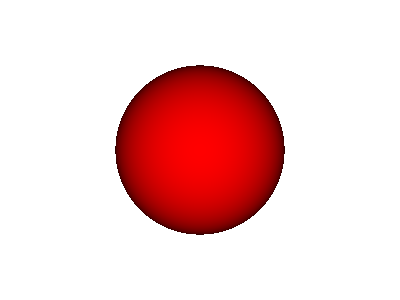

In [5]:
def f(x):
    VtkSourceSphere.SetRadius(x)
    return vtk_show(VtkRenderer)
w = interactive(f, x=widgets.FloatSlider(min=0,max=30,step=.1,value=5.0));
w

Create a tripple slider to allow the color of the sphere to be changed interactively. 

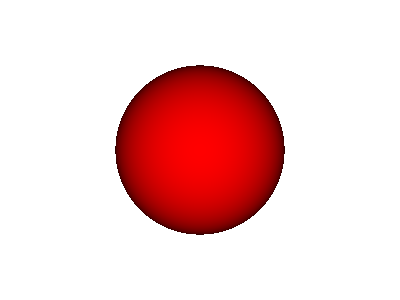

In [6]:
def g(r, g, b):
    VtkActorSphere.GetProperty().SetColor(r, g, b)
    return vtk_show(VtkRenderer)
z = interactive(g, 
                r=widgets.FloatSlider(min=0,max=1,step=.1,value=1.0), 
                g=widgets.FloatSlider(min=0,max=1,step=.1,value=0.0), 
                b=widgets.FloatSlider(min=0,max=1,step=.1,value=0.0)
               );
z

# VTK in Jupyter - (Interactive)

The following example creates a streamline plot using VTK example data. This can either be done interactively or inline with the "vtk_show()" function

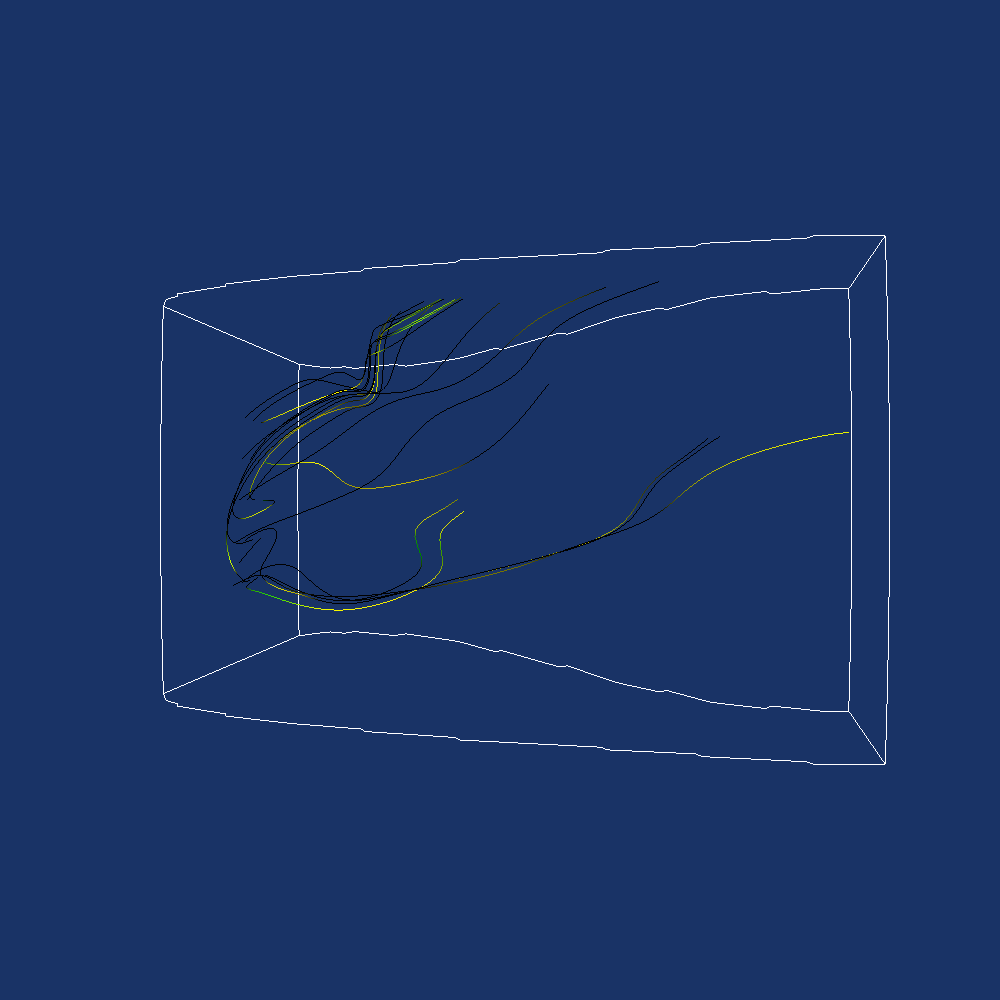

In [7]:
import vtk
pl3d = vtk.vtkMultiBlockPLOT3DReader()
 
xyx_file = "../VTKData/Data/combxyz.bin"
q_file = "../VTKData/Data/combq.bin"
pl3d.SetXYZFileName(xyx_file)
pl3d.SetQFileName(q_file)
pl3d.SetScalarFunctionNumber(100)
pl3d.SetVectorFunctionNumber(202)
pl3d.Update()
 
seeds = vtk.vtkPlaneSource()
seeds.SetXResolution(4)
seeds.SetYResolution(4)
seeds.SetOrigin(2,-2,26)
seeds.SetPoint1(2, 2,26)
seeds.SetPoint2(2,-2,32)
 
streamline = vtk.vtkStreamLine()
streamline.SetInputData(pl3d.GetOutput().GetBlock(0))
streamline.SetSourceConnection(seeds.GetOutputPort())
streamline.SetMaximumPropagationTime(200)
streamline.SetIntegrationStepLength(.2)
streamline.SetStepLength(0.001)
streamline.SetNumberOfThreads(1)
streamline.SetIntegrationDirectionToForward()
streamline.VorticityOn()
 
streamline_mapper = vtk.vtkPolyDataMapper()
streamline_mapper.SetInputConnection(streamline.GetOutputPort())
streamline_actor = vtk.vtkActor()
streamline_actor.SetMapper(streamline_mapper)
streamline_actor.VisibilityOn()
 
outline = vtk.vtkStructuredGridOutlineFilter()
outline.SetInputData(pl3d.GetOutput().GetBlock(0))
outline_mapper = vtk.vtkPolyDataMapper()
outline_mapper.SetInputConnection(outline.GetOutputPort())
outline_actor = vtk.vtkActor()
outline_actor.SetMapper(outline_mapper)
outline_actor.GetProperty().SetColor(1,1,1)
 
renderer = vtk.vtkRenderer()
render_window = vtk.vtkRenderWindow()
render_window.AddRenderer(renderer)
interactor = vtk.vtkRenderWindowInteractor()
interactor.SetInteractorStyle(vtk.vtkInteractorStyleTrackballCamera())
render_window.SetInteractor(interactor)
 
renderer.AddActor(streamline_actor)
renderer.AddActor(outline_actor)
 
renderer.SetBackground(0.1, 0.2, 0.4)

#--Interactive based rendering  
'''
interactor.Initialize()
render_window.Render()
interactor.Start()
'''

#--Image based rendering
#'''
def f(x, y, z):
    seeds.SetPoint1(x, y, z)
    return vtk_show(renderer, 1000, 1000)
w = interactive(f, 
                x=widgets.FloatSlider(min=2,max=5,step=1,value=2),
                y=widgets.FloatSlider(min=2,max=5,step=1,value=2),
                z=widgets.FloatSlider(min=24,max=30,step=1,value=24)
               );
w
#'''
